In [28]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc

In [29]:
# Loading dataset
df=pd.read_csv("/kaggle/input/heart-csv/heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [30]:
df.shape

(918, 12)

In [31]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [33]:
df.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Text(0.5, 1.0, 'Gender distribution')

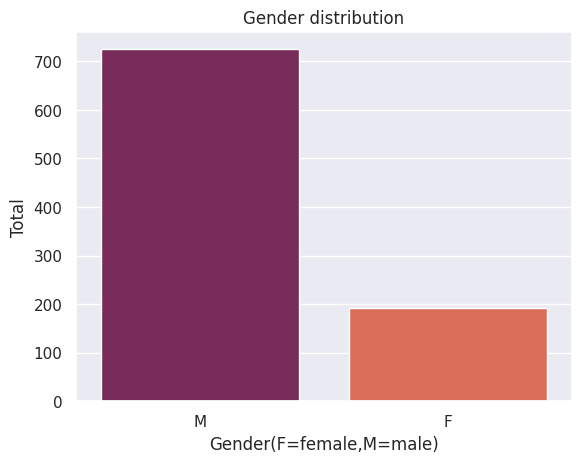

In [35]:
sns.set_theme(style="darkgrid")
sns.countplot(data=df,x=df["Sex"],palette="rocket")
plt.xlabel("Gender(F=female,M=male)")
plt.ylabel("Total")
plt.title("Gender distribution")

<Axes: >

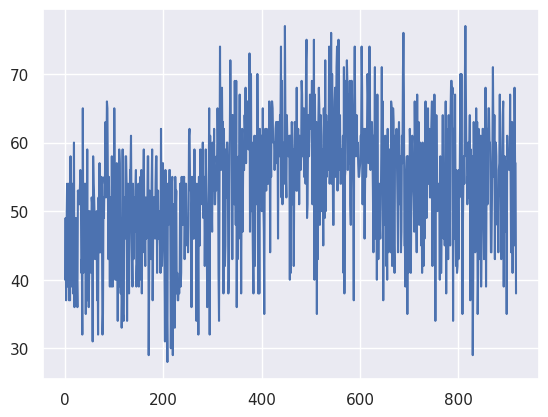

In [36]:
a=df['Age']
a.plot()

In [37]:
df["Sex"].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [38]:
df["Age"].value_counts()

Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: count, dtype: int64

In [39]:
df["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [40]:
pd.crosstab(df['Age'],df['HeartDisease'])

HeartDisease,0,1
Age,,
28,1,0
29,3,0
30,1,0
31,1,1
32,3,2
33,1,1
34,5,2
35,7,4
36,4,2


In [41]:
y=df.HeartDisease
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [42]:
x=df.drop("HeartDisease",axis="columns")
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [43]:
encoder=LabelEncoder()

In [44]:
x["Age"]=encoder.fit_transform(x["Age"])
x["ChestPainType"]=encoder.fit_transform(x["ChestPainType"])
x["RestingECG"]=encoder.fit_transform(x["RestingECG"])
x["ExerciseAngina"]=encoder.fit_transform(x["ExerciseAngina"])
x["ST_Slope"]=encoder.fit_transform(x["ST_Slope"])
x=pd.get_dummies(x)

In [45]:
# splitting the dataset into sets for testing and training.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3 ,random_state=101)

In [46]:
x_train

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_F,Sex_M
333,12,0,95,0,1,2,144,0,0.0,2,False,True
291,19,1,140,257,0,1,135,0,1.0,2,True,False
860,32,0,130,253,0,1,144,1,1.4,2,False,True
381,22,0,115,0,0,1,120,1,0.5,1,False,True
268,26,0,130,242,0,1,91,1,1.0,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
575,28,0,137,282,1,1,126,1,1.2,1,False,True
838,35,0,130,330,1,0,132,1,1.8,2,False,True
337,35,0,150,0,1,2,154,0,3.7,2,False,True
523,31,0,124,160,0,1,117,1,1.0,1,False,True


# **Define the Model**

In [47]:
# Creating an XGBoost classifier model
model = XGBClassifier(n_estimators=100, max_depth=3, random_state=101)

# **Training the Model**

In [48]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=101, ...)

In [49]:
model.score(x_test,y_test)

0.8442028985507246

# **By using the test set we can Predict**

In [50]:
y_pred = model.predict(x_test)

# **Assess the Model Performance**

In [51]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# **Results**

In [52]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 84.42%

Confusion Matrix:
[[102  24]
 [ 19 131]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       126
           1       0.85      0.87      0.86       150

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



# **Cross-validation scores**

In [53]:
cv_scores = cross_val_score(model, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.8423913  0.84782609 0.80434783 0.78688525 0.72131148]


# **Tuning hyperparameters using GridSearchCV**

In [54]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 5, 'n_estimators': 50}


# **Training the model with the best hyperparameters**

In [55]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=101, ...)

In [56]:
feature_importance = model.feature_importances_
feature_names = x.columns

In [57]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
           Feature  Importance
9         ST_Slope    0.429773
7   ExerciseAngina    0.128418
1    ChestPainType    0.115715
10           Sex_F    0.069831
4        FastingBS    0.061325
3      Cholesterol    0.040933
8          Oldpeak    0.038296
5       RestingECG    0.035711
6            MaxHR    0.030799
2        RestingBP    0.026928
0              Age    0.022271
11           Sex_M    0.000000


# **Receiver Operating Characteristic(ROC) Curve plotting**

In [58]:
#***Note*** Receiver Operating Characteristic(ROC) Curve is a graph showing the performance of a classification model at all classification thresholds
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

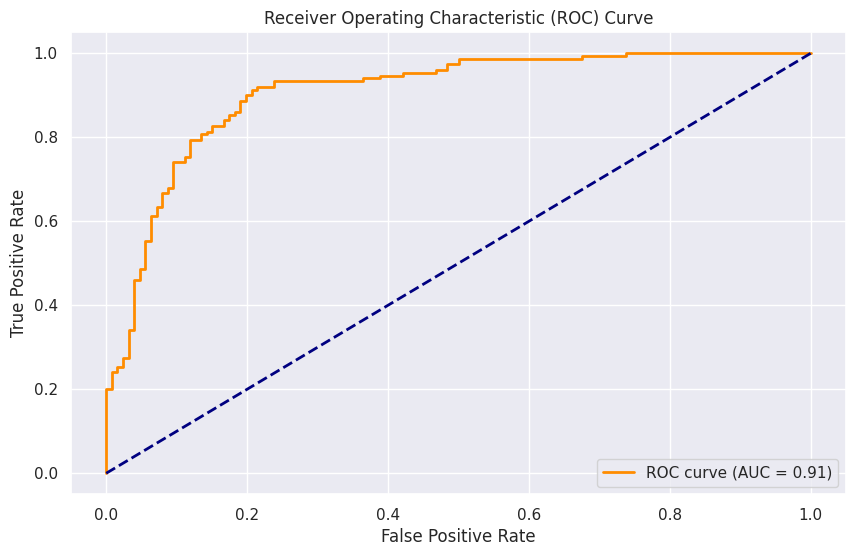

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()